In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("data.csv")
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [68]:
df.describe()

,kilometers,year
count,9.970000e+03,9000.000000
mean,9.894896e+04,2015.626444
std,1.154300e+06,4.735991
min,0.000000e+00,1953.000000
25%,2.314350e+04,2014.000000
50%,7.600000e+04,2016.000000
75%,1.330828e+05,2019.000000
max,1.150000e+08,2021.000000


In [69]:
df.dtypes

title                    object
price_in_aed             object
kilometers                int64
body_condition           object
mechanical_condition     object
seller_type              object
body_type                object
no_of_cylinders          object
transmission_type        object
regional_specs           object
horsepower               object
fuel_type                object
steering_side            object
year                    float64
color                    object
emirate                  object
motors_trim              object
company                  object
model                    object
date_posted              object
dtype: object

In [70]:
df.columns

Index(['title', 'price_in_aed', 'kilometers', 'body_condition',
       'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company',
       'model', 'date_posted'],
      dtype='object')

In [71]:
df.isna().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          59
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

In [72]:
df.shape

(9970, 20)

# Data Preprocessing

### Drop null Values of "motors_trim" , "title","no_of_cylinders"

### fixing "year" column then replacing missing values with mode

In [73]:
df= df[df["motors_trim"].notna()]
df = df[df["title"].notna()]
df = df.drop(df[df.no_of_cylinders== "Unknown"].index)
df = df[df["no_of_cylinders"].notna()]
df = df.drop(df[df.no_of_cylinders== "None"].index)
df["year"]= df["year"].fillna(df["year"].mode()[0])

### Make Column "age" out of the "year" column and "date_posted" year

In [74]:
df["age"] = 2022 - df["year"]
df = df.drop("year",axis=1)
df = df.drop("date_posted",axis=1)
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,age
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,Silver,Dubai,GLS,mitsubishi,pajero,9.0
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,White,Sharjah,1500 High Country,chevrolet,silverado,4.0
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,Blue,Sharjah,E 300,mercedes-benz,e-class,8.0
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,Red,Dubai,Standard,ferrari,488-spider,4.0
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,White,Dubai,Standard,renault,dokker,2.0


In [75]:
df.isna().sum()

title                   0
price_in_aed            0
kilometers              0
body_condition          0
mechanical_condition    0
seller_type             0
body_type               0
no_of_cylinders         0
transmission_type       0
regional_specs          0
horsepower              0
fuel_type               0
steering_side           0
color                   0
emirate                 0
motors_trim             0
company                 0
model                   0
age                     0
dtype: int64

### replace "," with nothing in "price_in_aed" then convert it into float

### convert "no_of_cylinders" to int and "year" to object

In [76]:
df["price_in_aed"]=df["price_in_aed"].apply(str).str.replace(",","")
df["no_of_cylinders"] =df["no_of_cylinders"].astype("int64")
df["price_in_aed"] =df["price_in_aed"].astype("float64")

In [77]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,age
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,Silver,Dubai,GLS,mitsubishi,pajero,9.0
1,chevrolet silverado,110000.0,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,White,Sharjah,1500 High Country,chevrolet,silverado,4.0
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000.0,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,Blue,Sharjah,E 300,mercedes-benz,e-class,8.0
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000.0,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,Red,Dubai,Standard,ferrari,488-spider,4.0
4,USED RENAULT DOKKER 2020,33000.0,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,White,Dubai,Standard,renault,dokker,2.0


### Get unique values for catagorical features

In [78]:
for i in df.select_dtypes("object"):
    print(f'{i} has ==> {df[i].nunique()} unique values, [{df[i].unique()}]' )
    print("\n")

title has ==> 9009 unique values, [['MITSUBISHI PAJERO 3.5L / 2013' 'chevrolet silverado'
 'MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OPTION' ...
 'WARRANTY AVAILABLE || Range Rover Sport SVR Carbon Edition 2022 Black-Black+Red New'
 'Chevrolet Malibu  GCC Spec'
 'LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler SAHARA 2013 Model!! in Orange Color! GCC Specs']]


body_condition has ==> 4 unique values, [['Perfect inside and out' 'Normal wear & tear, a few issues'
 'A bit of wear & tear, all repaired' 'No accidents, very few faults']]


mechanical_condition has ==> 5 unique values, [['Perfect inside and out' 'Minor faults, all fixed'
 'Major faults fixed, small remain' 'Ongoing minor & major faults'
 'Major faults, all fixed']]


seller_type has ==> 3 unique values, [['Dealer' 'Owner' 'Dealership/Certified Pre-Owned']]


body_type has ==> 13 unique values, [['SUV' 'Sedan' 'Hard Top Convertible' 'Wagon' 'Pick Up Truck' 'Van'
 'Coupe' 'Hatchback' 'Soft Top Convertible' 'Crossover' 'Sports 

### get unique values of features that have only 2 unique values

In [79]:
for i in df.select_dtypes("object"):
    if(df[i].nunique()==2):
        print(f'{i} has ==> {df[i].nunique()} unique values, [{df[i].unique()}]' )

transmission_type has ==> 2 unique values, [['Automatic Transmission' 'Manual Transmission']]
steering_side has ==> 2 unique values, [['Left Hand Side' 'Right Hand Side']]


In [80]:
df[["transmission_type","steering_side"]]

,transmission_type,steering_side
0,Automatic Transmission,Left Hand Side
1,Automatic Transmission,Left Hand Side
2,Automatic Transmission,Left Hand Side
3,Automatic Transmission,Left Hand Side
4,Manual Transmission,Left Hand Side
...,...,...
9965,Automatic Transmission,Left Hand Side
9966,Automatic Transmission,Left Hand Side
9967,Automatic Transmission,Left Hand Side
9968,Automatic Transmission,Left Hand Side


### LabelEncoding for "transmission_type" and "steering_side"

In [81]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df[["transmission_type","steering_side"]]:
    if(df[i].nunique()==2):
        df[i]= label_encoder.fit_transform(df[i])
        print(df[i].unique())

[0 1]
[0 1]


In [82]:
df[["transmission_type","steering_side"]]

,transmission_type,steering_side
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
9965,0,0
9966,0,0
9967,0,0
9968,0,0


### OrdinalEncoding for "body_condition" and "mechanical_condition"

In [83]:
from sklearn.preprocessing import OrdinalEncoder
OEncoder = OrdinalEncoder()
obj = df.select_dtypes("object")
num = df.select_dtypes(["float64","int64"])
for i in obj:
    if i in ["body_condition","mechanical_condition"]:
        df[i] = OEncoder.fit_transform(df[i].values.reshape(-1,1))

In [84]:
df[["body_condition","mechanical_condition"]]

,body_condition,mechanical_condition
0,3.0,4.0
1,3.0,4.0
2,3.0,4.0
3,3.0,4.0
4,3.0,4.0
...,...,...
9965,3.0,4.0
9966,3.0,4.0
9967,3.0,4.0
9968,1.0,4.0


### Mode Imputation for "horsepower"

In [85]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mode()[0])
df["horsepower"] = df["horsepower"].apply(str).str.replace("Unknown",df["horsepower"].mode()[0])

In [86]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,age
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,167390,3.0,4.0,Dealer,SUV,6,0,GCC Specs,200 - 300 HP,Gasoline,0,Silver,Dubai,GLS,mitsubishi,pajero,9.0
1,chevrolet silverado,110000.0,39000,3.0,4.0,Dealer,SUV,8,0,North American Specs,400 - 500 HP,Gasoline,0,White,Sharjah,1500 High Country,chevrolet,silverado,4.0
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000.0,200000,3.0,4.0,Dealer,Sedan,6,0,GCC Specs,400 - 500 HP,Gasoline,0,Blue,Sharjah,E 300,mercedes-benz,e-class,8.0
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000.0,27000,3.0,4.0,Dealer,Hard Top Convertible,8,0,GCC Specs,600 - 700 HP,Gasoline,0,Red,Dubai,Standard,ferrari,488-spider,4.0
4,USED RENAULT DOKKER 2020,33000.0,69000,3.0,4.0,Owner,Wagon,4,1,GCC Specs,Less than 150 HP,Gasoline,0,White,Dubai,Standard,renault,dokker,2.0


In [87]:
for i in df.select_dtypes("object"):
    print(f'{i} has unique values {df[i].nunique()}')
print(f' dataset has == {df.shape}')

title has unique values 9009
seller_type has unique values 3
body_type has unique values 13
regional_specs has unique values 5
horsepower has unique values 10
fuel_type has unique values 4
color has unique values 17
emirate has unique values 16
motors_trim has unique values 849
company has unique values 70
model has unique values 534
 dataset has == (9799, 19)


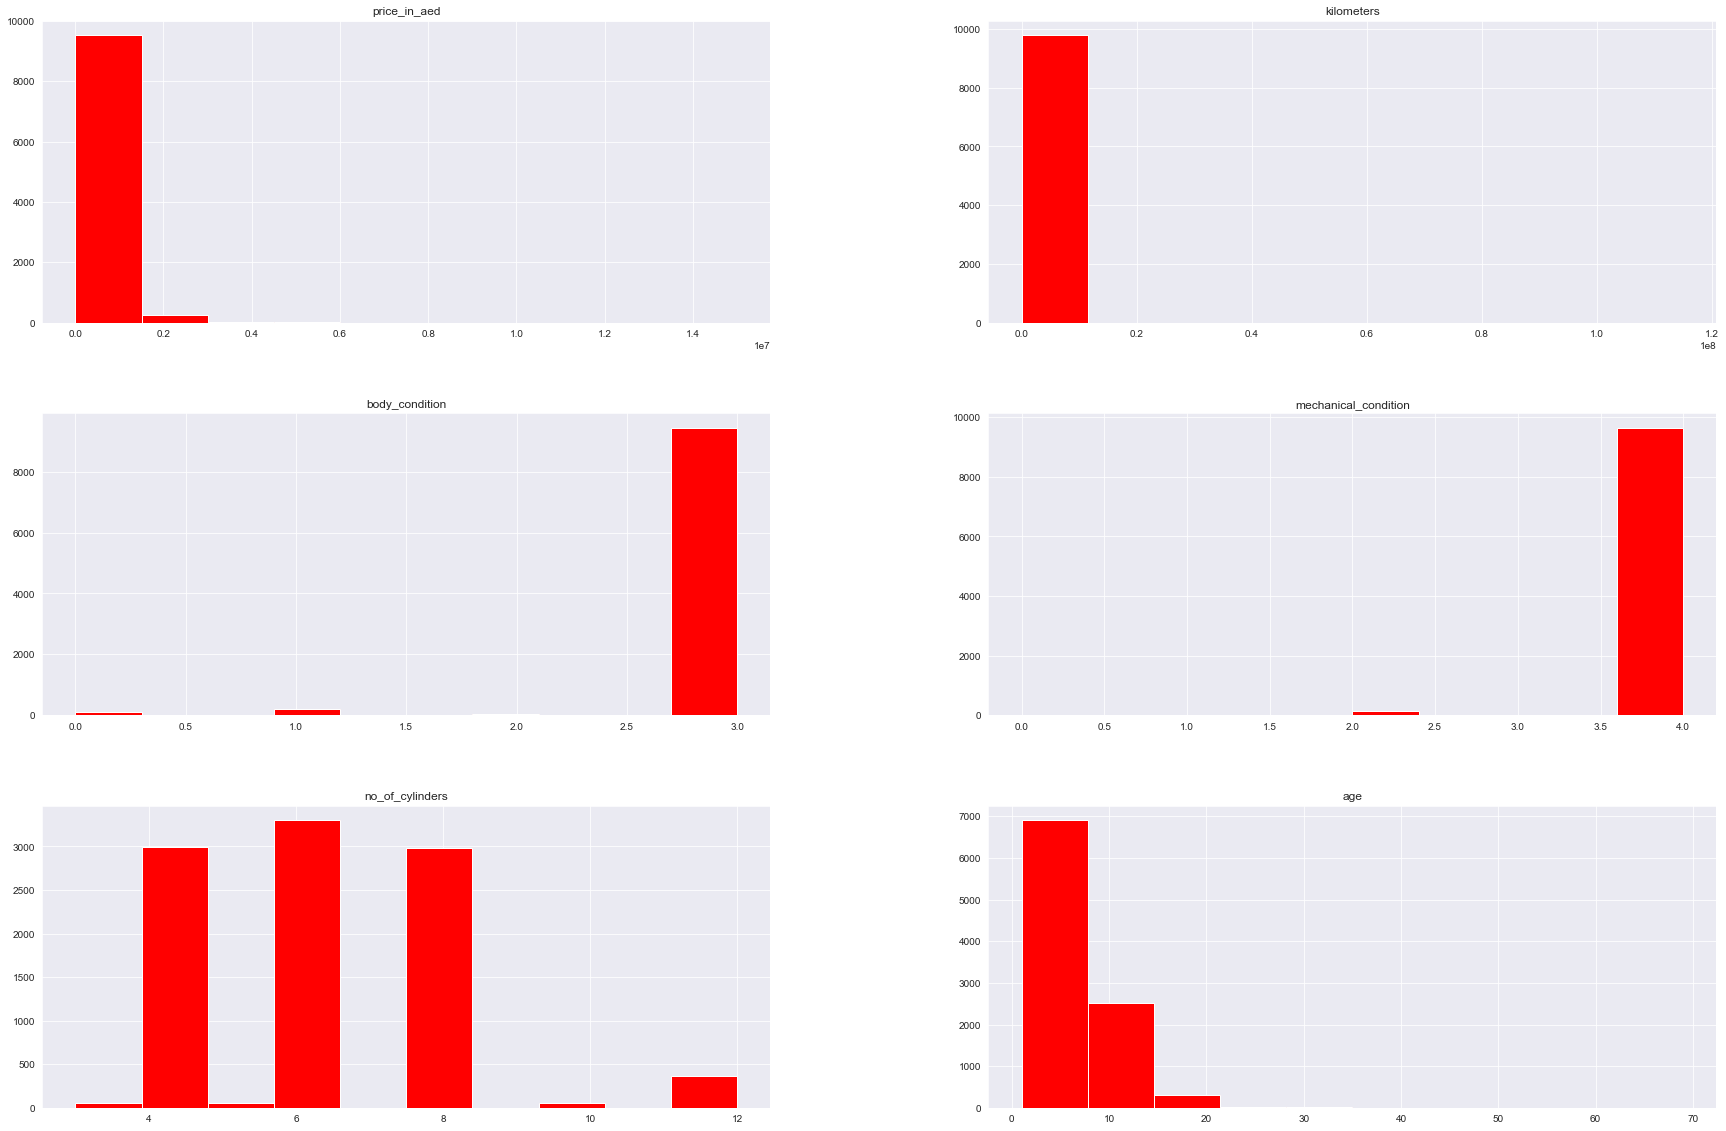

In [88]:
import matplotlib.pyplot as plt

df.select_dtypes(["float64","int64"]).hist(figsize=(30,20),color='red')
plt.show()

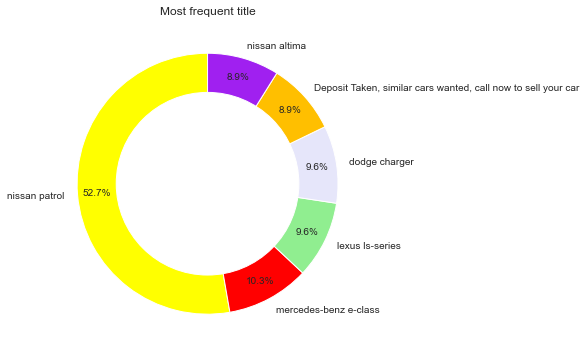

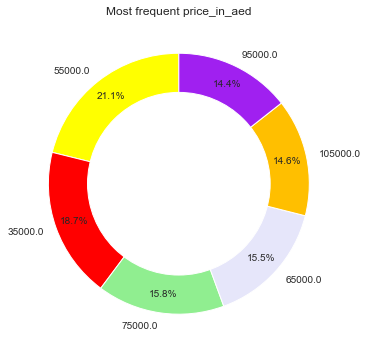

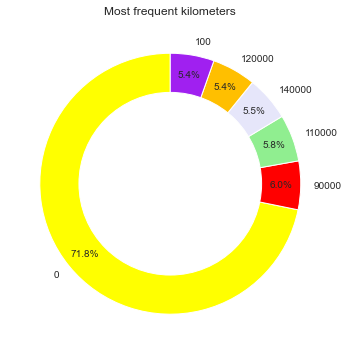

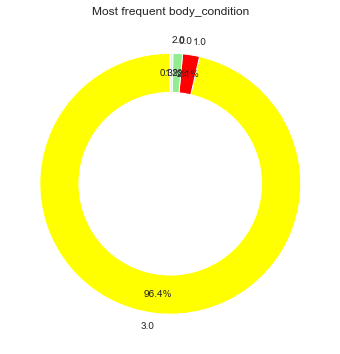

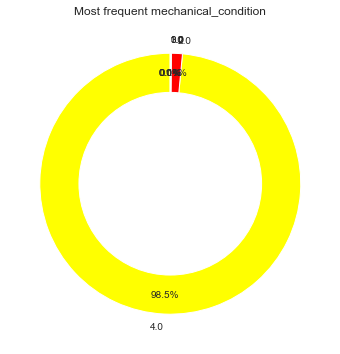

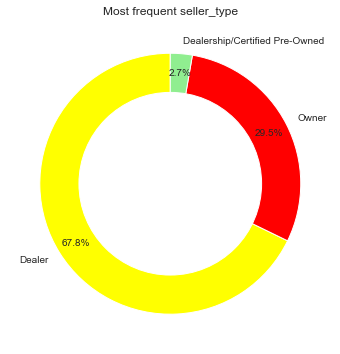

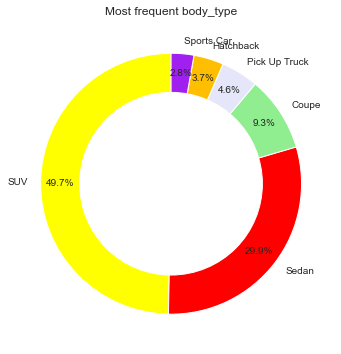

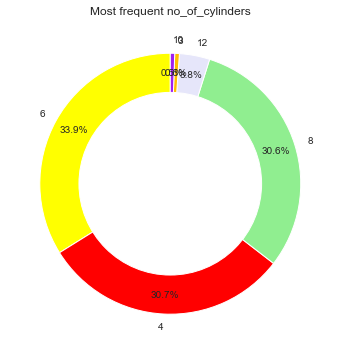

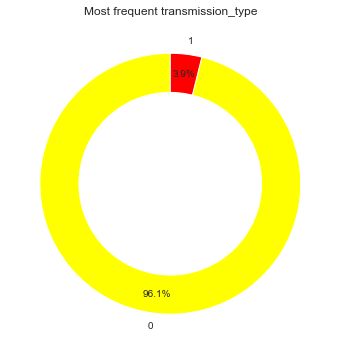

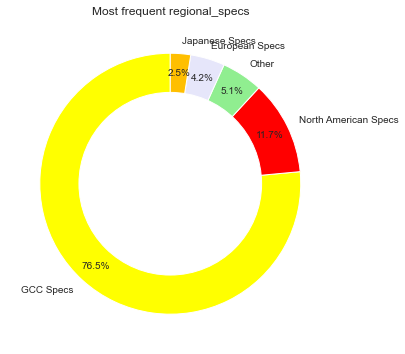

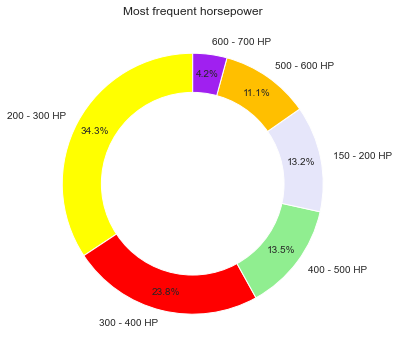

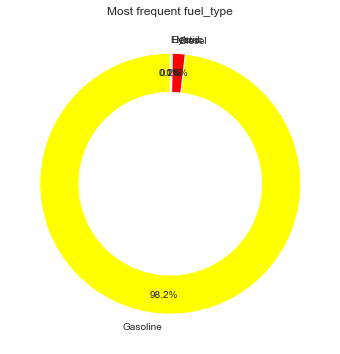

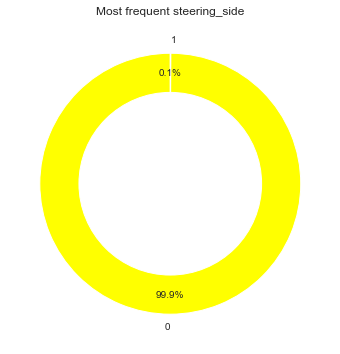

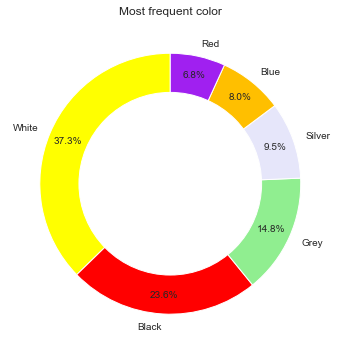

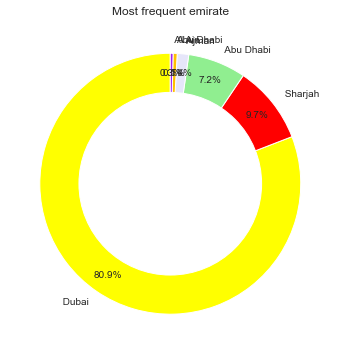

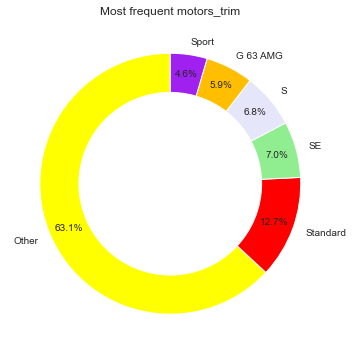

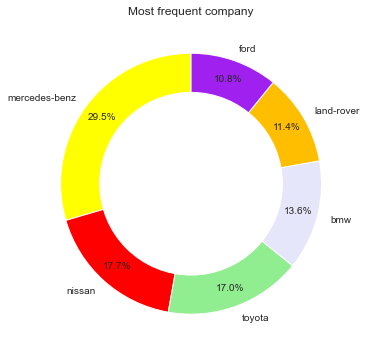

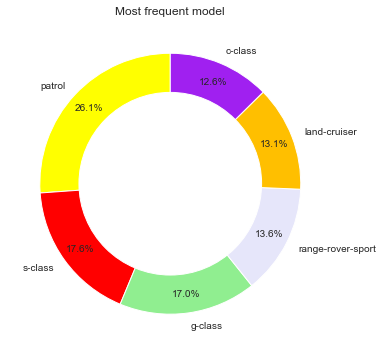

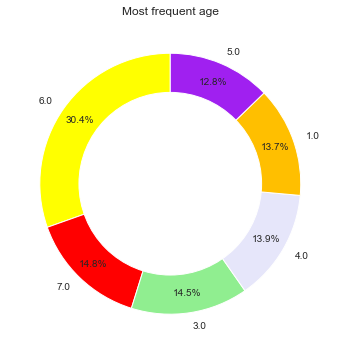

In [89]:
colors = ['#FFFF00','#FF0000','#90EE90','#E6E6FA','#FFBF00','#A020F0']

for i in df:
    ages = df[i].value_counts().index
    values = df[i].value_counts().values
    plt.pie(values[:6],labels=ages[:6],colors = colors,autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches(8,6)
    plt.title(f"Most frequent {i}")
    plt.show()

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


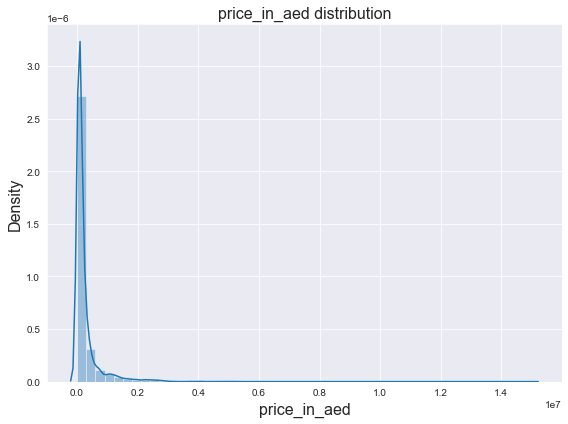

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


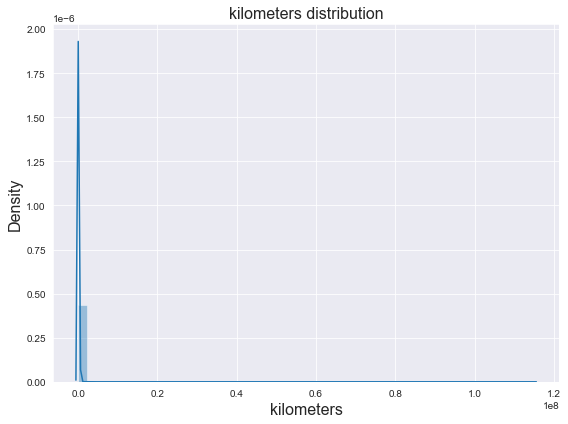

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


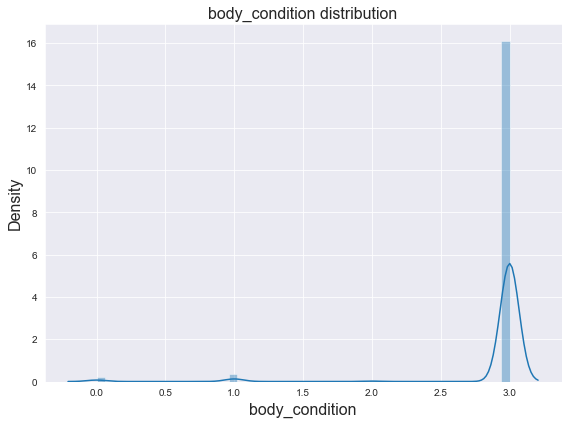

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


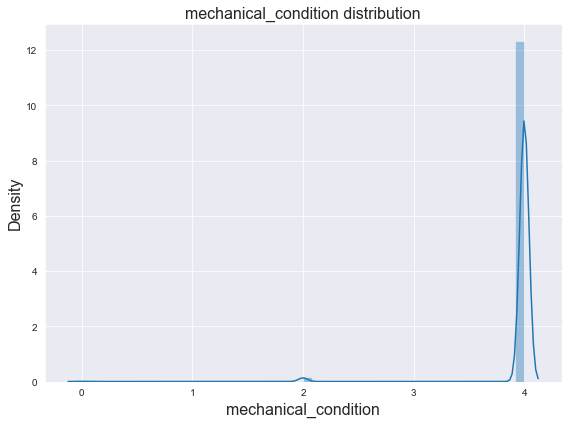

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


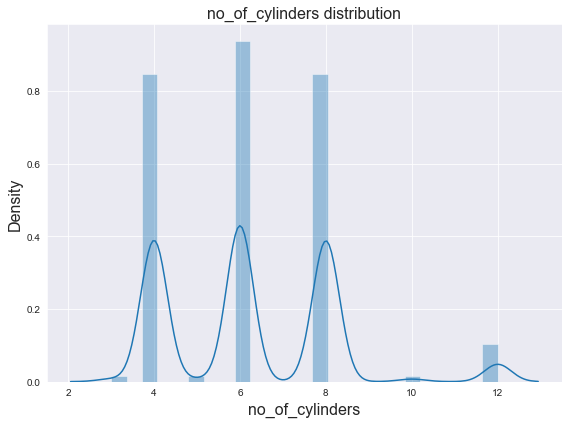

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


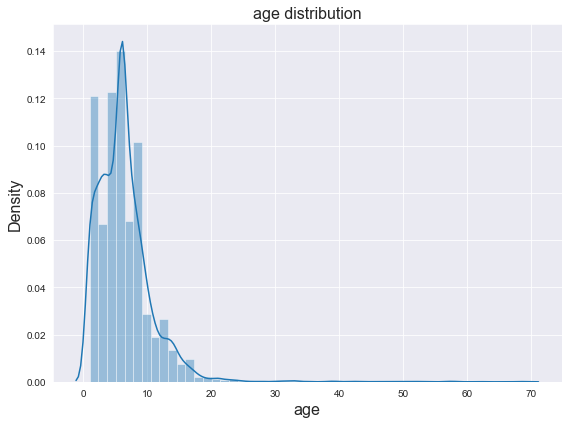

In [90]:
import seaborn as sns
title_font = {"size":16}
for column in df.select_dtypes(["float64","int64"]):
    plt.figure(figsize = (8, 6))
    sns.distplot(df[column])
    plt.xlabel(column,fontdict = title_font)
    plt.ylabel("Density",fontdict = title_font)
    plt.title(column+" distribution",fontdict = title_font)
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

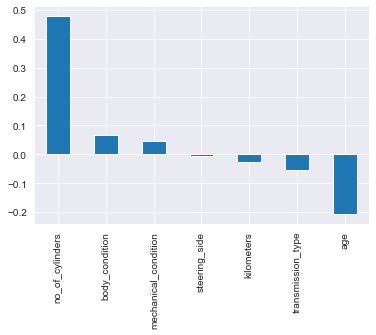

In [91]:
#Detecting the most correlated variables with the target variable
df.corr()['price_in_aed'].sort_values(ascending=False).drop('price_in_aed').plot(kind='bar')

<AxesSubplot:>

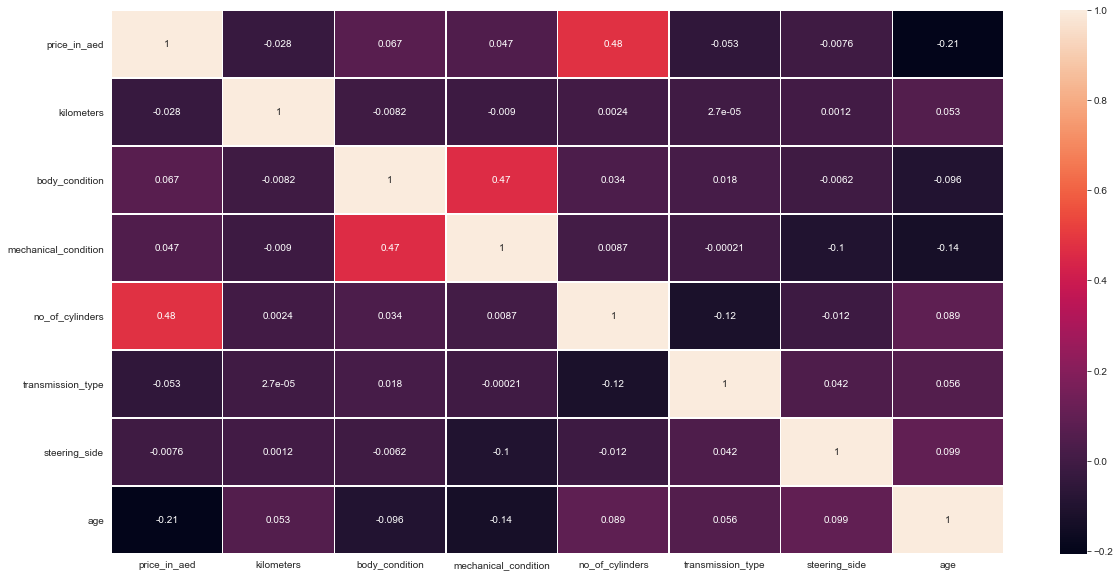

In [92]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.5)

### Dealing with Outliers(cap)

skewness of price_in_aed is 7.372633210383228


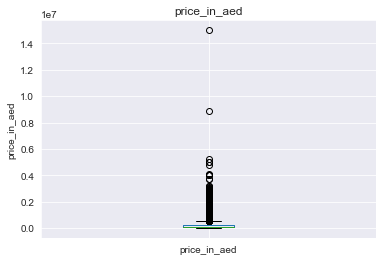

skewness of kilometers is 98.12210602272337


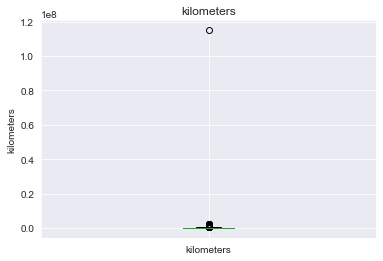

skewness of no_of_cylinders is 0.741878615339616


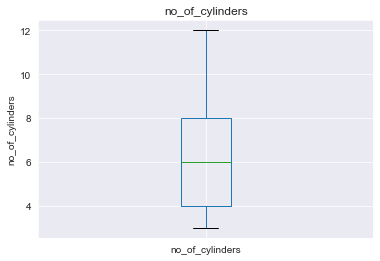

skewness of age is 3.475905786753181


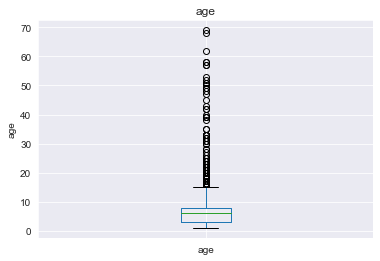

In [93]:
for feature in df.select_dtypes(["float64","int64"]).drop(["body_condition","mechanical_condition"],axis=1):
    df.boxplot(column=feature)
    print(f"skewness of {feature} is {df[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [94]:
for col in df.select_dtypes(["float64","int64"]).drop(["body_condition","mechanical_condition","no_of_cylinders"],axis=1):
    low, high = df[col].quantile([0.25, 0.75])
    for i in df[col].index:
        if (df[col][i]<low):
            df.loc[i, col] = low
        elif df[col][i]>high:
            df.loc[i, col] = high

skewness of price_in_aed is 0.3990157200442787


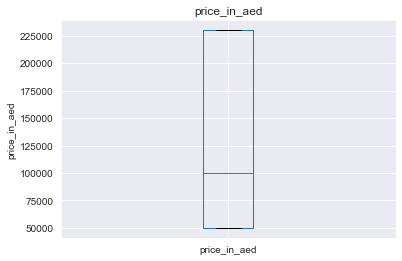

skewness of kilometers is 0.04258369411698313


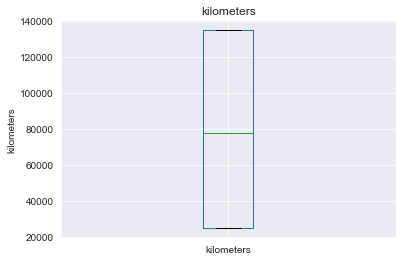

skewness of no_of_cylinders is 0.741878615339616


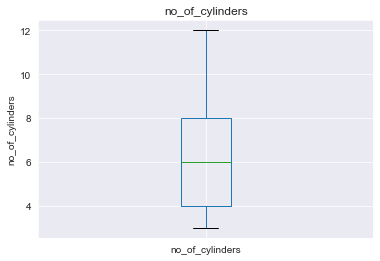

skewness of age is -0.16317941200457345


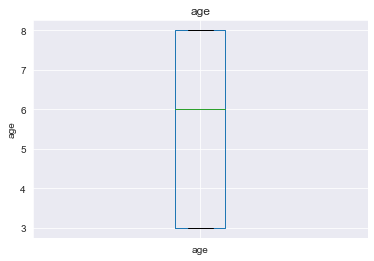

In [95]:
for feature in df.select_dtypes(["float64","int64"]).drop(["body_condition","mechanical_condition"],axis=1):
    df.boxplot(column=feature)
    print(f"skewness of {feature} is {df[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Dropping Duplicates

In [96]:
duplicate = df[df.duplicated(['title','price_in_aed','age'])]
duplicate

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,age
46,lexus ls-series,50000.0,89000,3.0,4.0,Dealer,Sedan,8,0,Japanese Specs,200 - 300 HP,Gasoline,0,Black,Abu Dhabi,3/4 Ultra,lexus,ls-series,8.0
306,nissan patrol,229900.0,25000,3.0,4.0,Dealer,SUV,8,0,GCC Specs,400 - 500 HP,Gasoline,0,White,Dubai,LE Titanium,nissan,patrol,3.0
326,nissan patrol,229900.0,33000,3.0,4.0,Dealer,SUV,8,0,GCC Specs,500 - 600 HP,Gasoline,0,White,Dubai,LE Titanium,nissan,patrol,3.0
551,nissan patrol,229900.0,52000,3.0,4.0,Dealer,SUV,8,0,GCC Specs,400 - 500 HP,Gasoline,0,Black,Ajman,Nismo,nissan,patrol,3.0
589,GLB 250 4M 7 STR,229900.0,25000,3.0,4.0,Dealership/Certified Pre-Owned,SUV,4,0,GCC Specs,200 - 300 HP,Gasoline,0,Black,Dubai,Other,mercedes-benz,glb,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,McLaren 720S,229900.0,25000,3.0,4.0,Owner,Sports Car,8,0,GCC Specs,700 - 800 HP,Gasoline,0,Grey,Dubai,Standard,mclaren,720s,3.0
9950,LEXUS IS 2010 MODEL GCC SPEC LADY DRIVEN,50000.0,134838,3.0,4.0,Owner,Coupe,6,0,GCC Specs,200 - 300 HP,Gasoline,0,Silver,Dubai,Platinum,lexus,is-series,8.0
9958,2021 MODEL TOYOTA LAND CRUISER 79 SINGLE CAB ...,130000.0,25000,3.0,4.0,Dealer,Pick Up Truck,6,1,GCC Specs,200 - 300 HP,Gasoline,0,Silver,Dubai,Other,toyota,land-cruiser,3.0
9961,2022 | LAMBORGHINI | HURACAN | EVO |SPYDER | L...,229900.0,25000,3.0,4.0,Dealer,Soft Top Convertible,10,0,European Specs,600 - 700 HP,Gasoline,0,Green,Dubai,Other,lamborghini,huracan,6.0


In [97]:
df = df.drop_duplicates(subset = ["title", "price_in_aed"])

### OneHotEncoding for every object column

In [98]:
for i in df[["body_type","regional_specs","seller_type","horsepower","fuel_type","color","emirate","motors_trim","company","model"]]:
    df=pd.get_dummies(df, columns = [i])

### Drop "title" column, "company" exists already

In [99]:
df = df.drop("title", axis=1)

In [100]:
df.head()

,price_in_aed,kilometers,body_condition,mechanical_condition,no_of_cylinders,transmission_type,steering_side,age,body_type_Coupe,body_type_Crossover,...,model_xt5,model_xt6,model_xterra,model_xts,model_yaris,model_yukon,model_z4,model_z8,model_zafira,model_zelas
0,50000.0,134838,3.0,4.0,6,0,0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,110000.0,39000,3.0,4.0,8,0,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,78000.0,134838,3.0,4.0,6,0,0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,229900.0,27000,3.0,4.0,8,0,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50000.0,69000,3.0,4.0,4,1,0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data target and features and standarize features

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('price_in_aed', axis=1)
y = df['price_in_aed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Modeling using RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9831826051856637
model score on testing data: 0.8843707852224582


In [103]:
ypredRF = model.predict(X_test)

In [104]:
data = {'Original':y_test,
        'Prediction':ypredRF}

# Create DataFrame
df_compareRF = pd.DataFrame(data)
df_compareRF

,Original,Prediction
1561,125000.0,100838.99
8099,132000.0,121164.99
7531,73900.0,64470.00
988,229900.0,229900.00
2874,50000.0,54179.98
...,...,...
9065,50000.0,50000.00
1586,50000.0,53299.00
6860,92000.0,123127.84
3011,229900.0,223644.88
